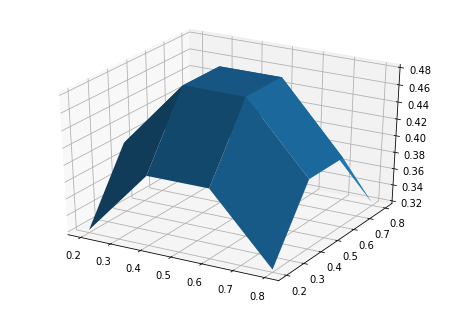

T:
 [[ 50. -25.   0.   0.]
 [-25.  50. -25.   0.]
 [  0. -25.  50. -25.]
 [  0.   0. -25.  50.]] 
U_exact:
 [[0.32 0.4  0.4  0.32]
 [0.4  0.48 0.48 0.4 ]
 [0.4  0.48 0.48 0.4 ]
 [0.32 0.4  0.4  0.32]] 
F:
 [[4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]] 
F_computed:
 [[12. 10. 10. 12.]
 [10.  4.  4. 10.]
 [10.  4.  4. 10.]
 [12. 10. 10. 12.]]


Text(0,0.5,'j')

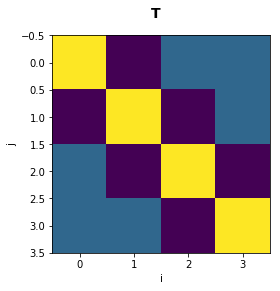

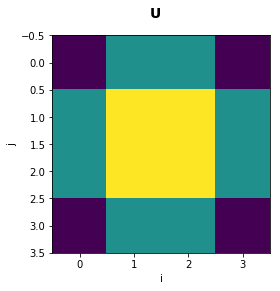

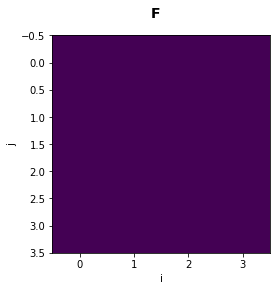

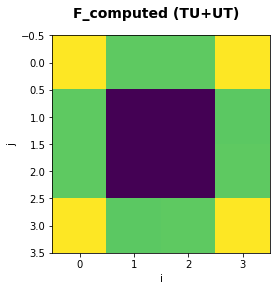

In [34]:
#Import necessary modules
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import time
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import pylab

#Define parameters
n = 4 #number of internal nodes in each direction (unknowns)
N = n+2 #total number of nodes in each direction
h = 1/(n+1) #step size

x = y = sp.linspace(h,1-h,n)
x, y = sp.meshgrid(x,y, indexing='ij')

# print(x, '\n', y)


#Implicity boundary as u=0
T=np.empty([n,n])
F=np.empty([n,n])
U=np.empty([n,n])

for i in range(0,n):
    for j in range(0,n):
        #Define F = 4
        F[i][j] = 4
        
        #Define T = -(1/h^2)tridiag(1,-2,1)
        if i==j:
            T[i][j] = -2*(-1/h**2)
        elif j==i-1 or j==i+1:
            T[i][j] = 1*(-1/h**2)
        else:
            T[i][j] = 0

U = x*(1-x) + y*(1-y)        
fig = pylab.figure()
ax = Axes3D(fig)
ax.plot_surface(x,y,U)
#ax.plot3D(sp.reshape(x,-1),sp.reshape(y,-1),sp.reshape(U,-1))
pylab.show()

# #Boundary specified explicitly 
# T=np.empty([N,N])
# F=np.empty([N,N])
# U=np.empty([N,N])
# Internal_sol = x*(1-x) + y*(1-y)      

# for i in range(0,N):
#     for j in range(0,N):
#         if i==0 or j==0 or i==N-1 or j==N-1:
#             F[i][j] = 0
#             T[i][j] = 0
#             U[i][j] = 0   
#         elif i==j:
#             T[i][j] = -2*(-1/h**2)
#             U[i][j] = Internal_sol[i-1][j-1]
#             F[i][j] = 4
#         elif j==i-1 or j==i+1:
#             T[i][j] = 1*(-1/h**2)
#             U[i][j] = Internal_sol[i-1][j-1]
#             F[i][j] = 4
#         else:
#             T[i][j] = 0
#             U[i][j] = Internal_sol[i-1][j-1]
#             F[i][j] = 4

F_computed = np.matmul(T, U) + np.matmul(U, T)            

print('T:\n', T, '\nU_exact:\n', U, '\nF:\n', F, '\nF_computed:\n', F_computed)

plt.figure(0)
plt.imshow(T)
plt.suptitle('T', fontsize=14, fontweight='bold')
plt.xlabel('i')
plt.ylabel('j')

plt.figure(2)
plt.imshow(U)
plt.suptitle('U', fontsize=14, fontweight='bold')
plt.xlabel('i')
plt.ylabel('j')

plt.figure(1)
plt.imshow(F)
plt.suptitle('F', fontsize=14, fontweight='bold')
plt.xlabel('i')
plt.ylabel('j')

plt.figure(3)
plt.imshow(F_computed)
plt.suptitle('F_computed (TU+UT)', fontsize=14, fontweight='bold')
plt.xlabel('i')
plt.ylabel('j')





